In [8]:
%matplotlib inline
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.nn as nn
import models.cnn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
  datasets.MNIST('data', train=True, download=True,
                 transform=transforms.ToTensor()),
  batch_size=batch_size, shuffle=True)

input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001
hp = {'input_size':input_size,
      'num_classes':num_classes,
      'num_epochs':num_epochs,
      'batch_size':batch_size ,
      'learning_rate':learning_rate,
      'hidden_n':1000}

cnn = models.cnn.ConvNet(hp) # models/cnn.py could be edited to change the network
cnn.train(train_loader)

Processing...
Done!
Epoch [1/5], Step [100/469], Loss: 0.1156
Epoch [1/5], Step [200/469], Loss: 0.0567
Epoch [1/5], Step [300/469], Loss: 0.0358
Epoch [1/5], Step [400/469], Loss: 0.0329
Epoch [2/5], Step [100/469], Loss: 0.0277
Epoch [2/5], Step [200/469], Loss: 0.0211
Epoch [2/5], Step [300/469], Loss: 0.0160
Epoch [2/5], Step [400/469], Loss: 0.0181
Epoch [3/5], Step [100/469], Loss: 0.0275
Epoch [3/5], Step [200/469], Loss: 0.0145
Epoch [3/5], Step [300/469], Loss: 0.0160
Epoch [3/5], Step [400/469], Loss: 0.0140
Epoch [4/5], Step [100/469], Loss: 0.0095
Epoch [4/5], Step [200/469], Loss: 0.0100
Epoch [4/5], Step [300/469], Loss: 0.0140
Epoch [4/5], Step [400/469], Loss: 0.0084
Epoch [5/5], Step [100/469], Loss: 0.0089
Epoch [5/5], Step [200/469], Loss: 0.0094
Epoch [5/5], Step [300/469], Loss: 0.0107
Epoch [5/5], Step [400/469], Loss: 0.0044


In [9]:
mnist_dataset = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

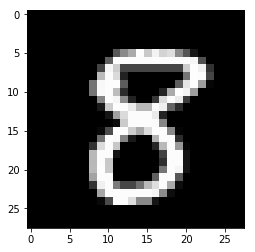

In [10]:
e,l = mnist_dataset[333]
t = e.view(28,28).numpy()
x = torch.tensor(e, requires_grad=True)
imgplot = plt.imshow(t, cmap='gray')


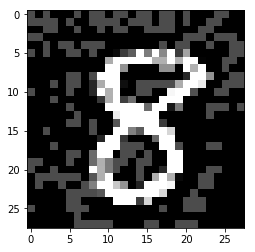

In [11]:
ep = 0.3
softmax = nn.Softmax(dim = 1)
y = cnn(x.view(-1, 1, 28, 28))# type(p)
loss = ((y - l.item()).norm()**2)
loss.backward()
eta = ep*x.grad.data.sign()
x_ = torch.clamp(x+eta, 0, 1).detach()
img = x_.view(28, 28).numpy()
imgplot = plt.imshow(img, cmap='gray')
z = cnn(x_.view(-1, 1, 28, 28))

In [12]:
correct = softmax(y.detach())
adversary = softmax(z.detach())
correct.max(1)[1].item()

8

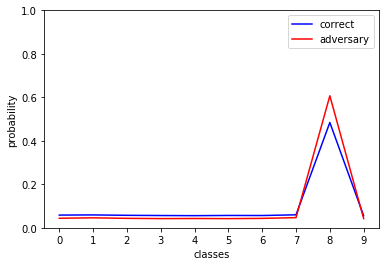

In [13]:
plt.xticks(range(0,10))
plt.ylim(0,1)
line = plt.plot(correct.view(10,-1).numpy(), 'b-', label='correct')
plt.xlabel("classes")
plt.ylabel("probability")
line = plt.plot(adversary.view(10,-1).numpy(), 'r-', label='adversary')
plt.legend()
plt.savefig('fig1.png')
plt.show()

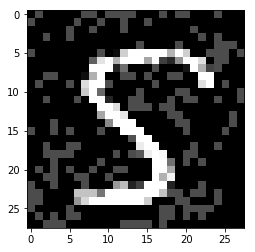

In [258]:
#get good adversaries
mnist_dataset = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
e,l = mnist_dataset[333]
t = e.view(28,28).numpy()
x = torch.tensor(e, requires_grad=True)
imgplot = plt.imshow(t, cmap='gray')
ep = 0.3
softmax = nn.Softmax(dim = 1)
y = cnn(x.view(-1, 1, 28, 28))# type(p)
loss = ((y - l.item()).norm()**2)
loss.backward()
eta = ep*x.grad.data.sign()
x_ = torch.clamp(x+eta, 0, 1).detach()
img = x_.view(28, 28).numpy()
imgplot = plt.imshow(img, cmap='gray')
z = cnn(x_.view(-1, 1, 28, 28))
correct = softmax(y.detach())
adversary = softmax(z.detach())
if correct.max(1)[1].item() != adversary.max(1)[1].item():
    

(tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0314,  0.4588,  0.9961,  0.8627,
            0.3490,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.000